In [393]:
%load_ext autoreload
%autoreload 2
from helpers import *
import itertools
import pandas as pd
from collections import Counter

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Step 1 - 3: Find Contrapositions

In [394]:
ruleset = getRuleset("lecture4") # / lecture4
print(" | ".join([str(r) for r in ruleset]))
add_Contrapositions(ruleset)

[r1]  -> c | [r2] d -> !b | [r3]  => a | [r4]  => b | [r5] a, b => !c | [r6] c => d | [r7] d => !a | [r8] !b => !r6

Contrapositions for  [r1]  -> c


Contrapositions for  [r2] d -> !b
[r2_1] b -> !d


Step 2 - 1: Generate Arguments

In [395]:
arguments = generateArguments(ruleset)

base arg A1(r1):  -> c 
base arg A2(r3):  => a 
base arg A3(r4):  => b 
 new arg A4(r5): A2,A3 => !c 
 new arg A5(r6): A1 => d 
 new arg A6(r7): A5 => !a 
 new arg A7(r2_1): A3 -> !d 
 new arg A8(r2): A5 -> !b 
 new arg A9(r8): A8 => !r6 


(Last defeasible rules)

In [396]:
for a in arguments:
    #print(a)
    print(str(a),":"," | ".join([str(r) for r in a.getLastDefeasibleRules()]))

A1(r1):  -> c  : 
A2(r3):  => a  : [r3]  => a
A3(r4):  => b  : [r4]  => b
A4(r5): A2,A3 => !c  : [r5] a, b => !c
A5(r6): A1 => d  : [r6] c => d
A6(r7): A5 => !a  : [r7] d => !a
A7(r2_1): A3 -> !d  : [r4]  => b
A8(r2): A5 -> !b  : [r6] c => d
A9(r8): A8 => !r6  : [r8] !b => !r6


In [397]:
# for a in arguments:
#     print("\n",a)
#     for s in a.getSubArguments():
#         print(str(s))

Step 2 - 2: set of all defeasible rules

In [398]:
INDEX = 3
drs = arguments[INDEX].getAllDefeasibleRules()
print(f"{arguments[INDEX].name} DRs: {' | '.join([x.name.name for x in drs])} ({len(drs)})")

A4 DRs: r5 | r3 | r4 (3)


Step 2 - 3: set of last defeasible rules

In [399]:
INDEX = 5
drs = arguments[INDEX].getLastDefeasibleRules()
print(f"{arguments[INDEX].name} LDRs: {' | '.join([x.name.name for x in drs])} ({len(drs)})")

A6 LDRs: r7 (1)


Step 2 - 4: set of all sub-arguments

In [400]:
argumentsINDEX = 10
subargs = arguments[INDEX].getSubArguments()
print(f"{arguments[INDEX].name} SAs: {' |  '.join([str(x) for x in subargs])} ({len(subargs)})")

A6 SAs: A5(r6): A1 => d  (1)


Step 3 - 1: generate undercuts for a given set of arguments

In [401]:
uas, uasUsable = generateUndercutAttacksV2(arguments)
uas

,0,1,2
0,A9(r8): A8 => !r6,--undercuts->,A5(r6): A1 => d
1,A9(r8): A8 => !r6,--undercuts->,A9(r8): A8 => !r6
2,A9(r8): A8 => !r6,--undercuts->,A8(r2): A5 -> !b
3,A9(r8): A8 => !r6,--undercuts->,A6(r7): A5 => !a


Step 3 - 2: generate rebuts for a given set of arguments

In [402]:
ras, rasUsable = generateRebutAttacks(arguments)
ras

,0,1,2,3,4
0,A1(r1): -> c,--rebuts->,"A4(r5): A2,A3 => !c",on,"A4(r5): A2,A3 => !c"
1,A2(r3): => a,--rebuts->,A6(r7): A5 => !a,on,A6(r7): A5 => !a
2,A3(r4): => b,--rebuts->,A8(r2): A5 -> !b,on,A8(r2): A5 -> !b
3,A3(r4): => b,--rebuts->,A9(r8): A8 => !r6,on,A8(r2): A5 -> !b
4,"A4(r5): A2,A3 => !c",--rebuts->,A1(r1): -> c,on,A1(r1): -> c
5,"A4(r5): A2,A3 => !c",--rebuts->,A5(r6): A1 => d,on,A1(r1): -> c
6,"A4(r5): A2,A3 => !c",--rebuts->,A6(r7): A5 => !a,on,A1(r1): -> c
7,"A4(r5): A2,A3 => !c",--rebuts->,A8(r2): A5 -> !b,on,A1(r1): -> c
8,"A4(r5): A2,A3 => !c",--rebuts->,A9(r8): A8 => !r6,on,A1(r1): -> c
9,A5(r6): A1 => d,--rebuts->,A7(r2_1): A3 -> !d,on,A7(r2_1): A3 -> !d


Step 4 - 1: generate preferences

In [403]:
# prefs = setPrefDict([
#     ["r4", "r6"], # preferred over \/
#     ["r2", "r7", "r8", "r9"]
# ])

prefs = setPrefDict([
    ["r3","r4","r5"],
    ["r6"],
    ["r7"],
    ["r8"]
])

ranking = rankArguments(arguments,
                        prefs,
                        electionPrinciple="democratic",
                        linkPrinciple="lastlink",
                        print_steps=False)
print_ranking(ranking)


RANKING RESULT

A1(r1):  -> c 

  \/ preferred over \/ 

A2(r3):  => a | A3(r4):  => b | A4(r5): A2,A3 => !c | A7(r2_1): A3 -> !d 

  \/ preferred over \/ 

A5(r6): A1 => d | A8(r2): A5 -> !b 

  \/ preferred over \/ 

A6(r7): A5 => !a 

  \/ preferred over \/ 

A9(r8): A8 => !r6 



### Step 4.3 - Generates all successful defeat

In [404]:
ranking = rankArguments(arguments, prefs, 
                        electionPrinciple="democratic",
                        linkPrinciple="lastlink",
                        print_steps=False)


successful_defeats = generateSuccessfulDefeats(arguments, ranking, prefs)

# for defeat in successful_defeats:
#     print('attacker: ', defeat[0])
#     print('defendant: ', defeat[1])
#     print('\n')

Defeats from Rebuts: 8, from Undercuts: 4, SUM: 12


In [405]:
for defeat in successful_defeats:
    print('attacker: ', defeat[0])
    print('defendant: ', defeat[1])
    print('\n')

attacker:  A3(r4):  => b 
defendant:  A8(r2): A5 -> !b 


attacker:  A3(r4):  => b 
defendant:  A9(r8): A8 => !r6 


attacker:  A7(r2_1): A3 -> !d 
defendant:  A6(r7): A5 => !a 


attacker:  A7(r2_1): A3 -> !d 
defendant:  A5(r6): A1 => d 


attacker:  A9(r8): A8 => !r6 
defendant:  A6(r7): A5 => !a 


attacker:  A1(r1):  -> c 
defendant:  A4(r5): A2,A3 => !c 


attacker:  A9(r8): A8 => !r6 
defendant:  A9(r8): A8 => !r6 


attacker:  A2(r3):  => a 
defendant:  A6(r7): A5 => !a 


attacker:  A9(r8): A8 => !r6 
defendant:  A5(r6): A1 => d 


attacker:  A9(r8): A8 => !r6 
defendant:  A8(r2): A5 -> !b 


attacker:  A7(r2_1): A3 -> !d 
defendant:  A8(r2): A5 -> !b 


attacker:  A7(r2_1): A3 -> !d 
defendant:  A9(r8): A8 => !r6 




Defeats from Rebuts: 8, from Undercuts: 4, SUM: 12


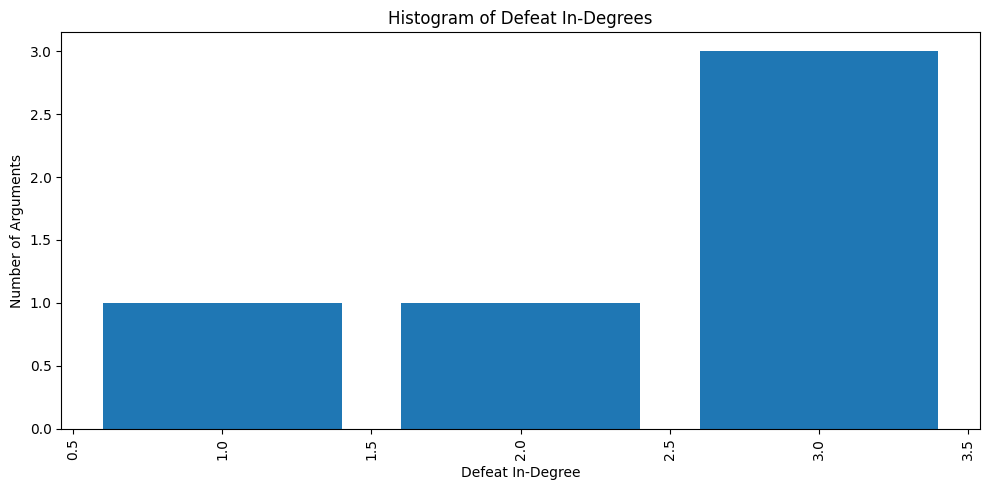

In [406]:
# POUR TP4 !!!

diff = differenceDefeatAttack(arguments, ranking, prefs)

plotDefeatByDegree(successful_defeats, True)

In [407]:
filteredAttacks = differenceDefeatAttack(arguments, ranking, prefs)
for filtered in filteredAttacks:
    print(f"filtered: {filtered}")
filtered_attacks_display =  ["|".join(map(str, attack)) for attack in filteredAttacks]

Defeats from Rebuts: 8, from Undercuts: 4, SUM: 12


TypeError: 'Undercut' object is not iterable